Побудувати моделi класифiкацiї на основi методу опорних векторiв:
• Моделi sklearn.svm.LinearSVC та SVC(kernel="linear") з лiнiйним
ядром, встановити велике значення параметра С. При використаннi

LinearSVC звернути увагу, що навчальнi данi мають бути попере-
дньо масштабованi i центрованi.

• Моделi з лiнiйним ядром i меншими значеннями параметра С для
даних, якi частково перетинаються.
• Моделi SVC(kernel="poly") з полiномiальними ядрами. Дослiдити

рiзнi ступенi degree та гiперпараметр coef0 - управляє тим, наскiль-
ки сильно полiноми високого ступеня впливають на модель порiв-
няно з полiномами низького ступеня.

• Моделi SVC(kernel="rbf") з ядром "гаусiвська радiальна базисна
функцiя". Розглянути рiзнi комбiнацiї гiперпараметрiв gamma i C,
такi як: gamma=0.1 i C=0.01; gamma=0.1 i C=1; gamma=0.1 i C=100;
gamma=10 i C=0.01; gamma=10 i C=1; gamma=10 i C=100.
Збiльшення gamma призводить до стиснення дзвоноподiбної кривої,
в результатi вплив кожного прикладу зменшується; границя рiшень

бiльше звивається навколо окремих прикладiв. Невелике значен-
ня gamma робить границю рiшень бiльш гладкою. Гiперпараметр

gamma дiє як регуляризатор: при перенавчаннi слiд зменшити зна-
чення gamma.

• Настроїти гiперпараметри С та degree за допомогою решiтчастого
пошуку.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs 
X, y_true = make_blobs(n_samples=400, centers=4,cluster_std=0.6, random_state = 0)
rng = np.random.RandomState (13)
X_stretched = np.dot (X, rng.randn(2, 2))

df = pd.DataFrame(X, y_true)
df.describe()

,0,1
count,400.000000,400.000000
mean,0.006099,3.953196
std,1.608781,2.599850
min,-2.948656,-0.765892
25%,-1.458826,1.722223
50%,0.003041,3.554779
75%,1.483425,5.639371
max,3.437618,9.263907


<Figure size 432x288 with 0 Axes>

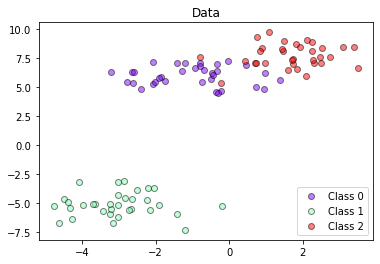

<Figure size 432x288 with 0 Axes>

In [2]:
# - візуалізація набору 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
X_blobs, y_blobs = make_blobs()

plt.figure()
y_unique = np.unique(y_blobs)
colors = cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
for this_y, color in zip(y_unique, colors):
    this_X = X_blobs[y_blobs == this_y]
    plt.scatter(
        this_X[:, 0],
        this_X[:, 1],
        c=color[np.newaxis, :],
        alpha=0.5,
        edgecolor="k",
        label="Class %s" % this_y,
    )
plt.legend(loc="best")
plt.title("Data")

plt.figure()

In [3]:
#надання цілого типу даних
df = df.astype({1:'int', 0: 'int' })
df.describe()

,0,1
count,400.000000,400.000000
mean,0.020000,3.475000
std,1.188753,2.602173
min,-2.000000,0.000000
25%,-1.000000,1.000000
50%,0.000000,3.000000
75%,1.000000,5.250000
max,3.000000,9.000000


In [4]:
#створення тестової та валідаційної виборки
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, y_true,
                     test_size=0.20,
                     random_state=1)

In [6]:
#scaled
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaler = sc.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [7]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(max_iter=300, activation='relu', solver='adam', random_state=1)

In [8]:
#train first MLP
mlp_clf.fit(x_train_scaled, Y_train)

d:\anaconda_\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1)

In [10]:
from sklearn.metrics import accuracy_score
y_pred = mlp_clf.predict(x_test_scaled)
print ('Accuracy: {:.2f}'.format(accuracy_score(Y_test, y_pred)))

Accuracy: 0.99


d:\anaconda_\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


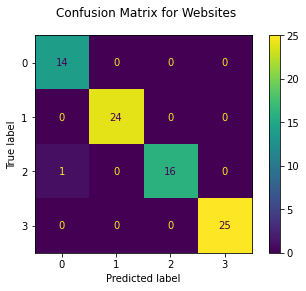

In [11]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(mlp_clf, x_test_scaled, Y_test, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Websites")
plt.show()

In [12]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      1.00      1.00        24
           2       1.00      0.94      0.97        17
           3       1.00      1.00      1.00        25

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.98        80
weighted avg       0.99      0.99      0.99        80



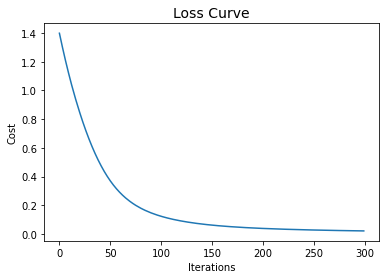

In [13]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Висновок

Одношарової моделі для цього набору даних цілком достатньо, адже значення accuracy_score максимальн близьке до 1.